In [1]:
import sys
import numpy as np
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True, precision=5)
np.set_printoptions(linewidth=1000)
np.core.arrayprint._line_width = 1000



def ims(imgarr, title=None, cmap=plt.cm.gray):
    # plt.imshow(image3)
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    fig, ax = plt.subplots(1, 1, dpi=125, tight_layout=False)
    ax.imshow(imgarr, cmap=cmap)
    ax.set_title("" if title is None else title, size=8)
    ax.set_axis_off()
    plt.show()

    
def mims(imlist, imtitles=None, layout=None, cmap=plt.cm.gray, figsize=(9, 5)):
    """
    Created faceted plot displaying all images in imlist.
    """
    if layout is None:
        nrow, ncol = 1, len(imlist)
    else:
        nrow, ncol = layout
    if imtitles is None:
        titles = ["image_{}".format(ii) for ii in range(len(imlist))]
    else:
        titles = imtitles
        
    fig, ax = plt.subplots(nrow, ncol, dpi=200, figsize=figsize, tight_layout=False)
    for ii, tup in enumerate(zip(imlist, titles)):
        img, img_title = tup
        ax[ii].imshow(img, cmap=cmap)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    

def disp_rgb(imgarr):
    """
    Create faceted quad plot of imgarr with R, G and B channels.
    """
    imgarr2 = imgarr.copy()
    
    # cv2: B, G, R
    img_names = ["full", "red", "green", "blue"]
    img_list = [imgarr2]
    for jj in range(3):
        arr = np.zeros_like(imgarr2)
        arr[:,:,jj] = imgarr2[:,:,jj]
        img_list.append(arr)
        
    fig, ax = plt.subplots(1, 4, dpi=200, figsize=(9, 5), tight_layout=False)
    for ii, tup in enumerate(zip(img_list, img_names)):
        img, img_title = tup
        ax[ii].imshow(img)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    
    
    
def b2r(img):
    B, G, R = cv2.split(img)
    return(cv2.merge([R, G, B]))
    


# Import functions from ps03.py.
sys.path.append("G:/Repos/GT/CS6476/ps03")
import ps3
import experiment



# Simulated images. 
tmpl_path = "G:/Repos/GT/CS6476/ps03/input_images/template.jpg"
# y_path0 = "G:/Repos/GT/CS6476/ps03/input_images/template_markers.png"
# y_path0 = "G:/Repos/GT/CS6476/ps03/input_images/sim_clear_scene.jpg"
# y_path1 = "G:/Repos/GT/CS6476/ps03/input_images/sim_noisy_scene_1.jpg"
# y_path2 = "G:/Repos/GT/CS6476/ps03/input_images/sim_noisy_scene_2.jpg"
# y_path3 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/simple_rectangle.png"
# y_path4 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/simple_rectangle_noisy.png"
# y_path5 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/simple_rectangle_noisy_gaussian.png"

# Real images. 
y_path0 = "G:/Repos/GT/CS6476/ps03/color.png"
y_path1 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-2-b_base.jpg"
y_path2 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-2-c_base.jpg"
y_path3 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-2-d_base.jpg"
y_path4 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-2-e_base.jpg"
y_path5 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/rectangle_wall.png"
# y_path6 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/rectangle_wall_noisy.png"
# y_path7 = "G:/Repos/GT/CS6476/ps03/input_images/test_images/rectangle_wall_noisy_gaussian.png"

# Part 3. 
# y_path0 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-a_base.jpg"
# y_path1 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-b_base.jpg"
# y_path2 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-c_base.jpg"

tmpl = cv2.imread(tmpl_path)
img0 = cv2.imread(y_path0)
img1 = cv2.imread(y_path1)
img2 = cv2.imread(y_path2)
img3 = cv2.imread(y_path3)
img4 = cv2.imread(y_path4)
img5 = cv2.imread(y_path5)
# img6 = cv2.imread(y_path6)
# img7 = cv2.imread(y_path7)



In [5]:
img.shape

(329, 560)

In [9]:
# img = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
# ims(np.flip(img, axis=1))

cv2.imwrite("G:/Repos/GT/CS6476/ps03/color2.png", np.flip(img, axis=1))



True

In [ ]:
"""
Evaluate find_markers.
"""
img = img5.copy()
tmpl_ = tmpl.copy()
tmpl_mono_ = cv2.cvtColor(tmpl_.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono_, (3, 3), 0)
mono_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mono = cv2.medianBlur(mono_, 3)


centers = ps3.find_markers(img, tmpl_, trace=True)

for ii, jj in centers:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        )  
    cv2.putText(
        img, "[{},{}]".format(int(ii), int(jj)), (int(ii)-10, int(jj)-20), cv2.FONT_HERSHEY_SIMPLEX, .70, (0,10,0), 3
        )

ims(b2r(img))





In [ ]:
centers = [(92, 276), (95, 900), (273, 276), (100, 895)]

for indx, cc_ref in enumerate(centers):
    #print(cc_ref)
    cc_chk = [
        tt for tt in centers if centers.index(tt)!=indx
        ]
    print(cc_chk)



In [ ]:
"""
Evaluate functions _simple_tmpl_search, _adaptive_harris_search and _adaptive_tmpl_search.
"""
img = img4.copy()
tmpl_ = tmpl.copy()
tmpl_mono_ = cv2.cvtColor(tmpl_.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono_, (3, 3), 0)
mono_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mono = cv2.medianBlur(mono_, 3)


centers0 = ps3._simple_tmpl_search(mono, tmpl_mono)
centers1 = ps3._adaptive_harris_search(mono)
centers2 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centers1)





In [ ]:
"""
Part 1.2
"""
img = img4.copy()

tmpl_ = tmpl.copy()
tmpl_mono_ = cv2.cvtColor(tmpl_.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono_, (3, 3), 0)
mono_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mono = cv2.medianBlur(mono_, 3)



# centers = ps3.find_markers(img, tmpl_)



    
# centers0 = ps3._simple_tmpl_search(mono, tmpl_mono)
centers1 = ps3._adaptive_harris_search(mono)
# centers2 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centers0)


# if centers0 is not None:
#     for ii, jj in centers0:
#         cv2.drawMarker(
#             img, (int(ii), int(jj)), (255, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
#             )   

# if centers1 is not None:
#     for ii, jj in centers1:
#         cv2.drawMarker(
#             img, (int(ii), int(jj)), (0, 255, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
#             )   


for ii, jj in centers1:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        )  
# for ii, jj in centers2:
#     cv2.drawMarker(
#         img, (int(ii), int(jj)), (255, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
#         )  
    cv2.putText(img, "[{},{}]".format(int(ii), int(jj)), (int(ii)-10, int(jj)-20), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,10,0), 3)

print(centers1)
ims(b2r(img))






In [ ]:
"""
Latest development.
"""
img = img5.copy()
MARK_COLOR0  = (0, 255, 255) # yellow
MARK_COLOR1  = (255, 0, 255) # magenta
MARKER_TYPE0 = cv2.MARKER_CROSS # cv2.MARKER_DIAMOND cv2.MARKER_TRIANGLE_UP cv2.MARKER_STAR cv2.MARKER_CROSS
MARKER_TYPE1 = cv2.MARKER_CROSS

mono_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# mono = cv2.GaussianBlur(mono_, (5, 5), 0)
mono = cv2.medianBlur(mono_, 3)
threshold0   = 150
EPS_PCT      = .25
ERR_CHECK    = "ind" #"ind"


# Find valid pixels for template image. Find template circle radius.
tmpl_mono_ = cv2.cvtColor(tmpl.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono_, (3, 3), 0)
tmpl_hh, tmpl_ww = tmpl_mono.shape
circles = cv2.HoughCircles(
    tmpl_mono, cv2.HOUGH_GRADIENT, 1, minDist=100, param1=30, param2=20,
    minRadius=(tmpl_mono.shape[0] // 2) - 4, maxRadius=tmpl_mono.shape[0] // 2
    )

# Generate grid of values over which to calculate distance from origin.
# Compute distances from origin to each point in (src_r_ii, src_c_jj).
# Bind reference to indices for which distance from origin <= radius.
circ_arr = circles.ravel()
origin_x, origin_y = [int(ii) for ii in circ_arr[:-1]]
radius = np.ceil(circ_arr[-1]).astype(np.int)
src_r_ii, src_c_jj = np.meshgrid(np.arange(tmpl_hh), np.arange(tmpl_ww), indexing="ij")
dists = np.sqrt((src_r_ii - origin_x)**2 + (src_c_jj - origin_y)**2)
r_indx, c_indx = np.where(dists>radius)


# [1] Detect corners using cornerHarris. 
harris = cv2.cornerHarris(mono, blockSize=2, ksize=3, k=.065)
temp = np.empty(harris.shape, dtype=np.float32)
cv2.normalize(harris, temp, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
harris_scl = cv2.convertScaleAbs(temp)
indx_init0 = np.where(harris_scl>threshold0)
indx_arr0 = np.hstack([np.asarray(aa, dtype=np.float32).reshape(-1,1) for aa in indx_init0])
criteria0 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, label0, means0 = cv2.kmeans(indx_arr0, 4, None, criteria0, 10, cv2.KMEANS_PP_CENTERS)
xx0, yy0  = list(zip(*means0))
centers0  = sorted(list(zip(yy0, xx0)), key=lambda v: v[0] + v[1])
err_check = None
centers1  = None

# [2] Apply template matching to image. If centers1 roughly corresponds to 
# center0, break and return template matched results. 
tracelist = []
for angle in np.arange(0, 180, 3):
    
    if angle in (0, 90):
        tmpl_ = tmpl_mono.copy()
        tmpl_h, tmpl_w = tmpl_.shape
    else:
        tmpl_ = ndimage.rotate(tmpl_mono.copy(), angle=angle, reshape=False)
        tmpl_[r_indx, c_indx] = 255
       
    for threshold1 in np.arange(.90, .40, -.1):
        
        temp_ = cv2.matchTemplate(mono.copy(), tmpl_, cv2.TM_CCOEFF_NORMED)
        indx_init1 = np.where(temp_>=threshold1)
        indx_arr1 = np.hstack([np.asarray(arr, dtype=np.float32).reshape(-1,1) for arr in indx_init1])

        try:
            criteria1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
            _, label1, means1 = cv2.kmeans(indx_arr1, 4, None, criteria1, 10, cv2.KMEANS_PP_CENTERS)
            centers1_ = _get_tmpl_centers(indx_arr1, label1, tmpl_w, tmpl_h)
            c_error = _get_centers_error(centers0, centers1_)
            tot_error = np.sum(c_error)
            err_check = np.all([ii<=EPS_PCT for ii in c_error])
            print("angle={}, threshold={}, error={}".format(angle, threshold1, tot_error))
            dcurr = {"angle":angle, "threshold":threshold1, "error":tot_error, "err_check":err_check, "centers":centers1_,}
            print(dcurr)
            tracelist.append(dcurr)
            if means1.shape[0]==4 and err_check:
                centers1 = centers1_
                break    
        except:
            continue
    else:
        continue # Only executed if inner loop did NOT break.
    break        # Only executed if inner loop DOES break.        
            

# Use centers with minimum tot_error if not yet bound. 
if centers1 is None or dcurr["error"]>.90:
    centers = centers0
else:
    centers = centers1

# for ii, jj in centers0:
#     cv2.drawMarker(
#         img, (int(ii), int(jj)), MARK_COLOR0, markerType=MARKER_TYPE0, markerSize=25, thickness=2
#         )
# for ii, jj in centers1:
#     cv2.drawMarker(
#         img, (int(ii), int(jj)), MARK_COLOR1, markerType=MARKER_TYPE1, markerSize=25, thickness=2
#         )                
for ii, jj in centers:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0, 255, 0), markerType=MARKER_TYPE1, markerSize=25, thickness=2
        )   
    cv2.putText(img, "[{},{}]".format(int(ii), int(jj)), (int(ii)-10, int(jj)-20), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,10,0), 3)

print("centers0: {}".format(centers0))
print("centers1: {}".format(centers1))
print("centers: {}".format(centers))
ims(b2r(img))


In [2]:
"""
Part 1.3.
"""
import os
os.chdir("G:/Repos/GT/CS6476/ps03")

img_path0 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-a_base.jpg"
img_path1 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-b_base.jpg"
img_path2 = "G:/Repos/GT/CS6476/ps03/input_images/ps3-3-c_base.jpg"

img0 = cv2.imread(img_path0)
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)

advert0 = cv2.imread("G:/Repos/GT/CS6476/ps03/input_images/img-3-a-1.png")
advert1 = cv2.imread("G:/Repos/GT/CS6476/ps03/input_images/img-3-a-1b.png")
advert2 = cv2.imread("G:/Repos/GT/CS6476/ps03/input_images/img-3-a-1c.png")

tmpl = cv2.imread("G:/Repos/GT/CS6476/ps03/input_images/template.jpg")
tmpl_mono0 = cv2.cvtColor(tmpl.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono0, (3, 3), 0)

# mono_ = cv2.cvtColor(scene.copy(), cv2.COLOR_BGR2GRAY)
# mono = cv2.medianBlur(mono_, 3)


[[  1.49404  -0.00518 105.     ]
 [  0.26288   1.10063  84.     ]
 [  0.00061   0.        1.     ]]


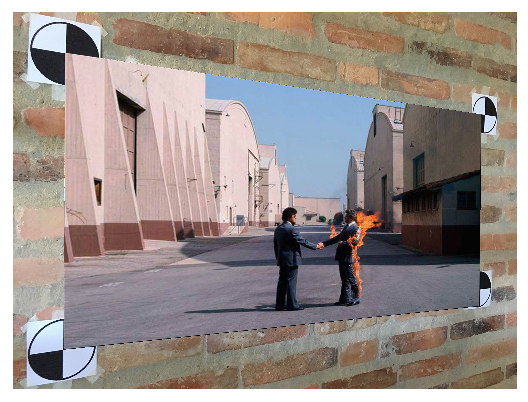

In [5]:
# def find_four_point_transform
scene = img0.copy()
advert = advert0.copy()

# pts1 = scene/ subject image.
# pts2 = sorted rectangle  points. 
# advert = imageA
# scene - imageB

# Assume points are correctly ordered ul, ll, ur and lr. 
scene_hh, scene_ww, scene_cc = scene.shape
src_points = ps3.get_corners_list(advert)
dst_points = ps3.find_markers(scene, template=tmpl, trace=False)
homography = ps3.find_four_point_transform(src_points, dst_points)

print(homography)


imageA = advert.copy()
imageB = scene.copy()

img_final = ps3.project_imageA_onto_imageB(imageA, imageB, homography)


ims(b2r(img_final))

#imgw = ps3.project_imageA_onto_imageB(advert.copy(), scene.copy(), H)



# mono_ = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
# mono = cv2.medianBlur(mono_, 3)
# corners = ps3._adaptive_harris_search(mono, threshu=200)

# for ii, jj in corners:
#     cv2.drawMarker(
#         scene, (int(ii), int(jj)), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=25, thickness=2
#         )  
                      

# ims(b2r(img_final))
                      


In [ ]:
corners

In [ ]:
corners = [(int(ii), int(jj)) for ii,jj in ps3._sort_markers(imgw, corners)]
mask = np.zeros(scene.shape, dtype=np.uint8)
ul, ll, ur, lr = corners
dstp = np.asarray([ll, lr, ur, ul], dtype=np.int32)
cv2.fillPoly(mask, [dstp], (255, 255, 255))
mask = cv2.bitwise_not(mask)
img_masked = cv2.bitwise_and(scene.copy(), mask)
img_final = cv2.bitwise_or(imgw, img_masked)


ims(b2r(mask))

ims(b2r(img_masked))

ims(b2r(img_final))

In [ ]:
ims(b2r(imgw))

mask = np.zeros(scene.shape, dtype=np.uint8)

ul, ll, ur, lr = corners
dstp = np.asarray([ll, lr, ur, ul], dtype=np.int32)
cv2.fillPoly(mask, [dstp], (255, 255, 255))
mask = cv2.bitwise_not(mask)
img_masked = cv2.bitwise_and(scene.copy(), mask)
img_final = cv2.bitwise_or(imgw, img_masked)


ims(b2r(mask))

ims(b2r(img_masked))

ims(b2r(img_final))

In [ ]:


mask = np.zeros(scene.shape, dtype=np.uint8)
corners = ps3.find_markers(scene, template=tmpl, trace=False)
ul, ll, ur, lr = corners
dstp = np.asarray([ll, lr, ur, ul], dtype=np.int32)
cv2.fillPoly(mask, [dstp], (255, 255, 255))
mask = cv2.bitwise_not(mask)
img_masked = cv2.bitwise_and(scene.copy(), mask)
img_final = cv2.bitwise_or(imgw, img_masked)

ims(b2r(img_final))



In [ ]:

mask = np.zeros(scene.shape, dtype=np.uint8)
corners = ps3.find_markers(scene, template=tmpl, trace=False)
ul, ll, ur, lr = corners
dstp = np.asarray([ll, lr, ur, ul], dtype=np.int32)
cv2.fillPoly(mask, [dstp], (255, 255, 255))
mask = cv2.bitwise_not(mask)
img_masked = cv2.bitwise_and(scene.copy(), mask)
img_final = cv2.bitwise_or(imgw, img_masked)

ims(b2r(img_masked))





In [ ]:
# Warp the coordinates of src to those of true_dst
map_ind = H.dot(lin_homg_ind)

map_x, map_y = map_ind[:-1]/map_ind[-1]  # ensure homogeneity
map_x = map_x.reshape(h, w).astype(np.float32)
map_y = map_y.reshape(h, w).astype(np.float32)

In [ ]:
# def to_mtx(img):
#     H,V,C = img.shape
#     mtr = np.zeros((V,H,C), dtype='int')
#     for i in range(img.shape[0]):
#         mtr[:,i] = img[i]
#     return mtr


# def to_img(mtr):
#     V,H,C = mtr.shape
#     img = np.zeros((H,V,C), dtype='int')
#     for i in range(mtr.shape[0]):
#         img[:,i] = mtr[i]
#     return img


mtr = advert.copy()

r, c = (scene_ww, scene_hh)

dst = np.zeros((r, c, mtr.shape[2]))


c_jj, r_ii = np.meshgrid(np.arange(scene_hh), np.arange(scene_ww), indexing="ij")

for ii, jj in zip(r_ii.ravel(), c_jj.ravel()):
    
    h = np.dot(H, np.asarray([ii, jj, 1]))
    ii2, jj2, _ = (h / h[-1] + .5).astype(np.int)
    if np.all([ii2>=0, ii2<r, jj2>=0, jj2<c]):
        dst[jj2, ii2] = mtr[jj,ii]
    
    



ims(b2r(dst))

In [ ]:
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
    return img



img = advert.copy()

# mtr = to_mtx(img) # rotate counter clockwise 90 degrees.

# R, C = (scene_ww, scene_hh)

# dst = np.zeros((R, C, mtr.shape[2]))


# r_ii, c_jj = np.meshgrid(np.arange(scene_hh), np.arange(scene_ww), indexing="ij")
#for i, j in zip(r_ii.ravel(), c_jj.ravel()):
mtr = to_mtx(img)
R,C = (scene_ww, scene_hh)
dst = np.zeros((R, C, mtr.shape[2]))

for i in range(mtr.shape[0]):
    
    for j in range(mtr.shape[1]):
        
        res = np.dot(H, [i,j,1])
        
        i2,j2,_ = (res / res[2] + 0.5).astype(int)
        
        if i2 >= 0 and i2 < R:
            
            if j2 >= 0 and j2 < C:
                
                dst[i2,j2] = mtr[i,j]
    

ims(b2r(to_img(dst)))








In [ ]:
"""
Directly calling cv2.getPerspectiveTransform and warpPerspective.
"""
srcp = np.asarray([list(ii) for ii in src_points]).astype(np.float32)
dstp = np.asarray([list(ii) for ii in dst_points]).astype(np.float32)
H = cv2.getPerspectiveTransform(srcp, dstp)
H

imgw = cv2.warpPerspective(advert.copy(), H, (scene_ww, scene_hh))


In [ ]:

H1 = cv2.getPerspectiveTransform(srcp, dstp)
H1








In [ ]:
np.sum(H**2)

In [ ]:
A[-1, -1]

In [ ]:
a = np.asarray(range(1, 10)).reshape(9,1)

a.reshape(3, 3)


In [ ]:
dst_points

In [ ]:
scene = img2.copy()
advert = advert0.copy()


src_points = ps3.get_corners_list(advert)
markers = ps3.find_markers(scene, template=tmpl, trace=True)


homography = ps3.find_four_point_transform(src_points, markers)

        projected_img = ps3.project_imageA_onto_imageB(advert, scene,
                                                       homography)





print("src_points: {}.".format(src_points))
print("markers   : {}.".format(markers))


In [ ]:
# c0 = ps3._simple_tmpl_search(mono, tmpl_mono.copy())
# c1 = ps3._adaptive_harris_search(mono.copy())
# c2 = ps3._adaptive_tmpl_search(mono.copy(), tmpl_mono.copy(), c1)


print("cc: {}".format(cc))
# print("c0: {}".format(c0))
# print("c1: {}".format(c1))
# print("c2: {}".format(c2))

for ii, jj in cc:
    cv2.drawMarker(
        scene, (int(ii), int(jj)), (255, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        )  
    cv2.putText(
        scene, "[{},{}]".format(int(ii), int(jj)), (int(ii)-10, int(jj)-20), cv2.FONT_HERSHEY_SIMPLEX, .70, (0, 0, 0), 2
        )

ims(b2r(scene))

In [ ]:




src_points = ps3.get_corners_list(advert)

for img_in, img_out in zip(input_images, output_images):
print("Input image: {}".format(img_in))

# Open image and identify the four marker positions
scene = cv2.imread(os.path.join(IMG_DIR, img_in))

markers = ps3.find_markers(scene, template)

homography = ps3.find_four_point_transform(src_points, markers)

projected_img = ps3.project_imageA_onto_imageB(advert, scene,
                                               homography)